# Fit Random Forest Classifier on February 2021 to August 2021 Training Features

In [1]:
import json
import os
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from odc.io.cgroups import get_cpu_quota
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    cohen_kappa_score,
    confusion_matrix,
    precision_score,
    recall_score
)
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedShuffleSplit,
)
from utils import get_key

In [2]:
output_folder ="results"

# CSV file containing the training features.
model_input_path = os.path.join(output_folder, 'feb_2021_to_aug_2021_training_features_training.csv')

model_path = os.path.join(output_folder, "feb_2021_to_aug_2021_ml_model.joblib")

# Dictionary with class labels
class_labels_path = "clean_data/class_labels.json"

# Classifier to use
classifier = RandomForestClassifier

# Hyperparameters for the classifier
param_grid = {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': None, 'n_estimators': 400}

# The number of cross validation splits to use for optimizing the hyperparameters. A good default number is 5
n_splits = 5

# random state
random_state = 42

In [3]:
# Get the number of cpus available
ncpus = round(get_cpu_quota())
print("ncpus = " + str(ncpus))

ncpus = 15


In [4]:
# Load the training data
model_input_df = pd.read_csv(model_input_path)
label_col = model_input_df.columns[0]
feature_cols = model_input_df.columns[1:]

# Split the data into features and labels
X = model_input_df[feature_cols].values
y = model_input_df[label_col].values.ravel()

In [5]:
%%time
# Fit the classifier with the selected hyperparameters on the training dataset.
model = classifier(**param_grid, random_state=random_state, n_jobs=ncpus)
model.fit(X, y)

CPU times: user 3min 14s, sys: 94.3 ms, total: 3min 14s
Wall time: 13.3 s


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None, n_estimators=400, n_jobs=15,
                       random_state=42)

In [6]:
# Save the model
dump(model, model_path)

['results/feb_2021_to_aug_2021_ml_model.joblib']

Most importance features: 
 Index(['red_edge_1_2021-02-28', 'swir_2_2021-08-31', 'SAVI_2021-06-30',
       'swir_1_2021-08-31', 'red_edge_2_2021-07-31', 'red_edge_3_2021-02-28',
       'swir_1_2021-04-30', 'swir_1_2021-07-31', 'swir_2_2021-04-30',
       'vv_2021-05-31'],
      dtype='object')


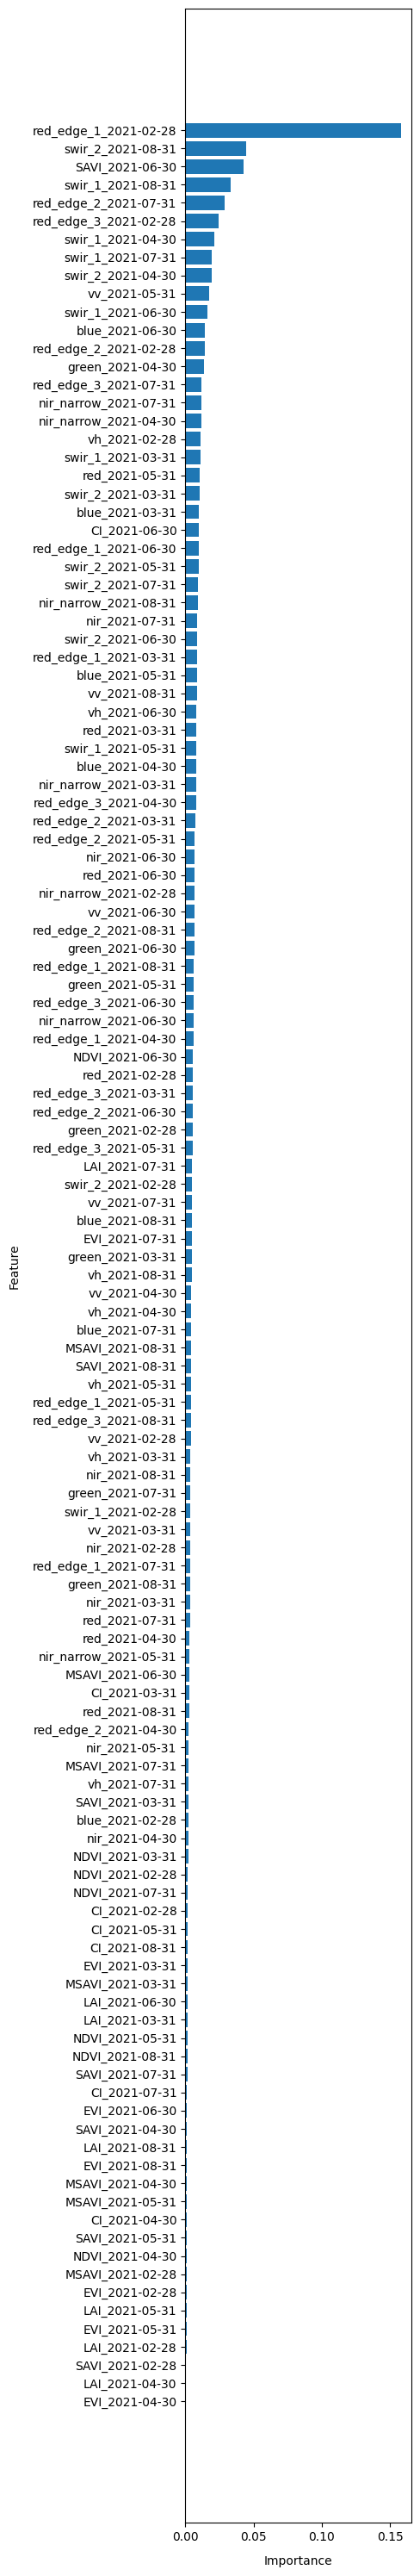

In [7]:
# Examine feature importance 
feat_importance_indices=np.argsort(model.feature_importances_)[::-1][:10]
print('Most importance features: \n', feature_cols[feat_importance_indices])
plt.figure(figsize=(5,30))
order=np.argsort(model.feature_importances_)
plt.barh(y=np.array(feature_cols[order]), width=model.feature_importances_[order])
plt.gca().set_xlabel('Importance', labelpad=10);
plt.gca().set_ylabel('Feature', labelpad=10)
plt.tight_layout();